---


#PROYECTO FINAL: CLASIFICACION DE IMAGENES 


**EGUIVAR VILLCA SHIRLEY CARMINIA**


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
from sklearn.cluster import KMeans
from keras.datasets import cifar10

##Loading & preparing CIFAR-10 data

---


In [ ]:
# Load CIFAR-10 data 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


##Determine shape of the data


---


El siguiente paso es determinar la forma de una muestra. Keras requiere esto para comprender qué datos puede esperar en la INPUT LAYER de su red neuronal.

In [ ]:
print("Shape of x_train: {}".format(train_X.shape))
print("Shape of y_train: {}".format(train_Y.shape))
print()
print("Shape of x_test: {}".format(test_X.shape))
print("Shape of y_test: {}".format(test_Y.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


Image (#1902): Which is label number '[7]', or label 'horse''


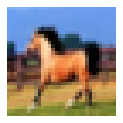

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
sample = 1902 
each = train_X[sample]

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,train_Y[sample], labelNames[train_Y[sample][0]]))

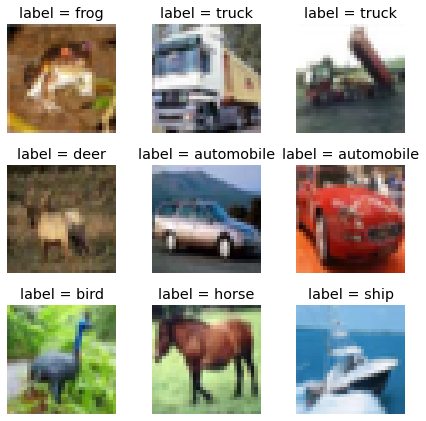

In [ ]:
ROW = 3
COLUMN = 3
plt.figure(figsize=(6, 6)) 
for i in range(ROW * COLUMN):
    image = train_X[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow((image).astype(np.uint8), interpolation='nearest')  
    plt.title('label = {}'.format(labelNames[train_Y[i][0]]))
    #plt.imshow((out * 255).astype(np.uint8))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()


##Data Procesing

---

Convertimos la data en el formato float32 , esto deberia acelerar el training. Luego normalizamos la data , n el rango [−1,1] 

In [ ]:
# Checking the minimum and maximum values of x_train
print(train_X.min())
print(train_X.max())

# Parse numbers as floats
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
# Normalize data 
## the max value is 255, that is the reson why we divide with that num
train_X=train_X/255.0
test_X=test_X/255.0

0
255


In [ ]:
x_train_flat = train_X.reshape(train_X.shape[0], train_X.shape[1]* train_X.shape[2]* train_X.shape[3])
x_test_flat = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2] * test_X.shape[3])
print(x_train_flat.shape)
print(x_test_flat.shape)
# Estamos cambiando la forma por que ,  nos da error si no lo hacemos 4dim max 2
#train_X = train_X.reshape(50000,32*32*3)
#test_X = test_X.reshape(10000,32*32*3)


(50000, 3072)
(10000, 3072)


In [ ]:
print(train_X.shape)
print(test_X.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
#train_X = train_X.reshape(50000,32*32*3)
#test_X = test_X.reshape(10000,32*32*3)

In [ ]:
# El Y tambien tiene que cambiar de forma
train_Y = train_Y.reshape(train_Y.shape[0], )
test_Y = test_Y.reshape(test_Y.shape[0], )
print(train_Y.shape)
print(test_Y.shape)

(50000,)
(10000,)


In [ ]:
np.random.seed(1)

In [ ]:
n = 10

In [ ]:
kmeans = KMeans(n_clusters=n,init='random')
#t(X=word_vectors.vectors.astype('double'))
kmeans.fit(x_train_flat)
#Z = kmeans.predict(data)

KMeans(init='random', n_clusters=10)

In [ ]:
#from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# Predicting the clusters
km_pred_Y = kmeans.predict(x_test_flat)


In [ ]:
kmeans.cluster_centers_.shape

(10, 3072)

In [ ]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

-----------------KMeans Report---------------
F1 score: 0.08317890522589086
Accuracy score: 0.0865
Confusion matrix: 
 [[ 37  84  32 204  57 104 137 113 206  26]
 [134 157 106  34 103  85  95 178  45  63]
 [176  45 120 113 237  55  41  62  79  72]
 [158  68 128  84 163  79  19 109  54 138]
 [219  56 123  68 231  41  19  53  18 172]
 [111  44  93 120 166  65  24 167  37 173]
 [223  30 213  28 204  82  10  82  40  88]
 [121 158  60  57 200 116  48  85  21 134]
 [ 19 194  33 100  37  30 325 179  41  42]
 [111 328  20  22  77 132 149  86  40  35]]
Plotting confusion matrix


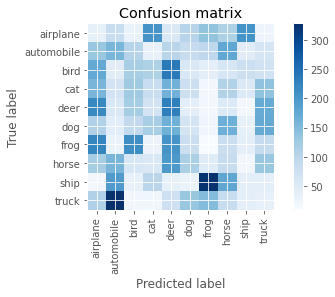

              precision    recall  f1-score   support

           0       0.03      0.04      0.03      1000
           1       0.13      0.16      0.15      1000
           2       0.13      0.12      0.12      1000
           3       0.10      0.08      0.09      1000
           4       0.16      0.23      0.19      1000
           5       0.08      0.07      0.07      1000
           6       0.01      0.01      0.01      1000
           7       0.08      0.09      0.08      1000
           8       0.07      0.04      0.05      1000
           9       0.04      0.04      0.04      1000

    accuracy                           0.09     10000
   macro avg       0.08      0.09      0.08     10000
weighted avg       0.08      0.09      0.08     10000



In [ ]:
# KMeans report and analysis
#y_pred_svc = svc.predict(test_Y)
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
km_f1 = metrics.f1_score(test_Y, km_pred_Y, average= "weighted")
km_accuracy = metrics.accuracy_score(test_Y, km_pred_Y)
km_cm = metrics.confusion_matrix(test_Y, km_pred_Y)
print("-----------------KMeans Report---------------")
print("F1 score: {}".format(km_f1))
print("Accuracy score: {}".format(km_accuracy))
print("Confusion matrix: \n", km_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(km_cm, labelNames)
plt.show()

print(metrics.classification_report(test_Y, km_pred_Y))

##Conclusion


---

El score obtenido esta por muy por debajo, no llega ni a 1 , entonces necesitamos mejorar, apesar que todos los intentos no se pudo mejorar el score, por lo que adicione un tercer Modelo


## Drawing the clusters


---



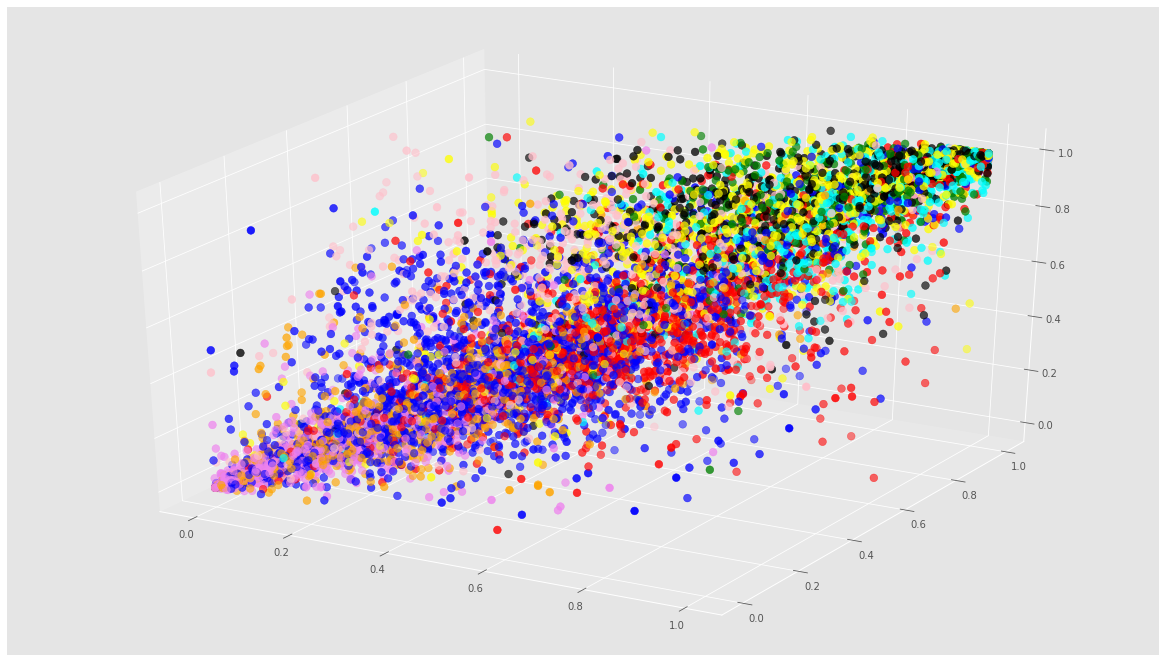

In [ ]:

# Getting the cluster centers
C = kmeans.cluster_centers_
colores= ['violet','blue','red','green','blue','cyan','yellow','orange','black','pink']#,'brown','purple']#['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'random',
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Reviewing some examples of the data and the clusters assigned


---



cluster 0
925 elementos


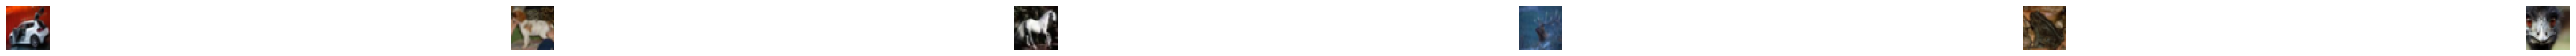

cluster 1
1113 elementos


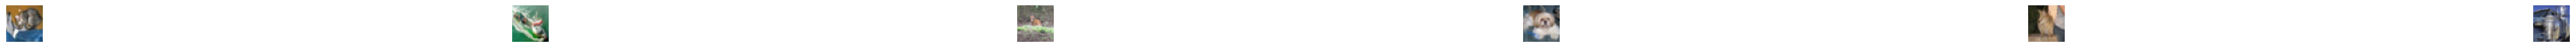

cluster 2
1477 elementos


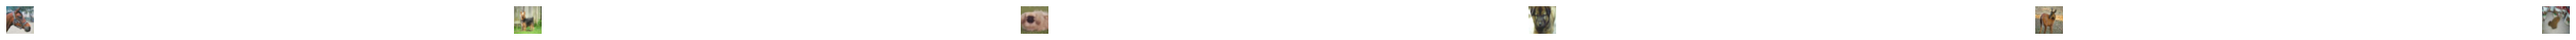

cluster 3
581 elementos


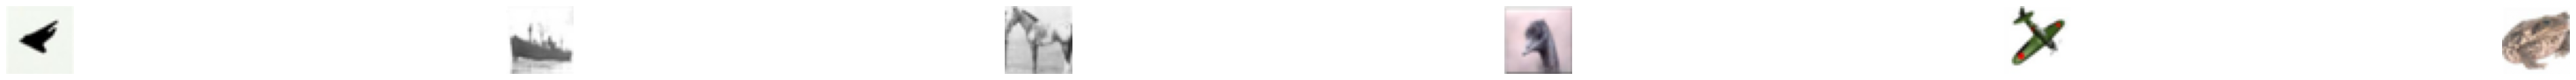

cluster 4
1310 elementos


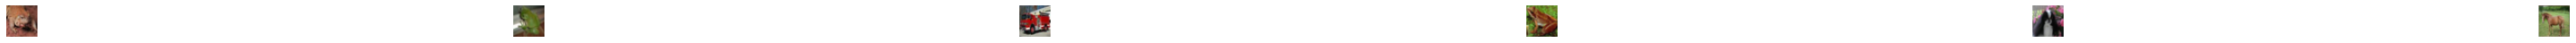

cluster 5
789 elementos


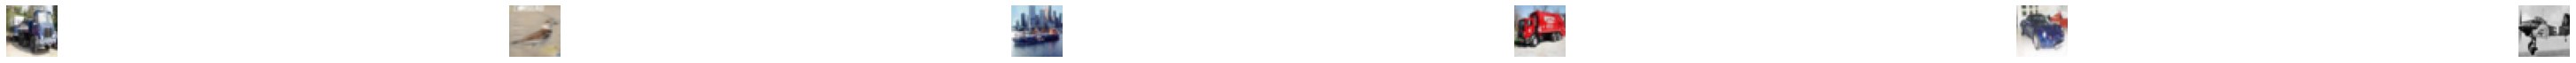

cluster 6
1164 elementos


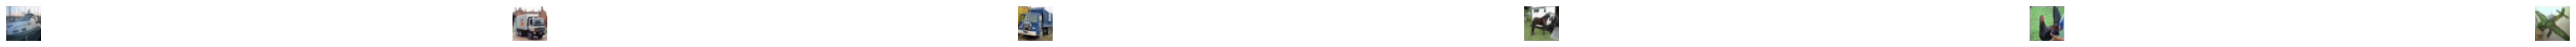

cluster 7
943 elementos


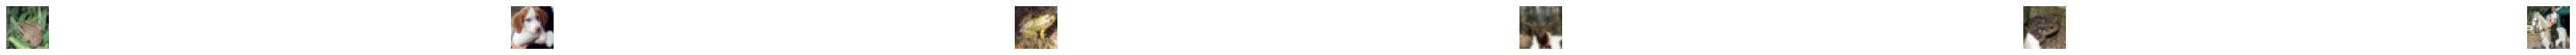

cluster 8
867 elementos


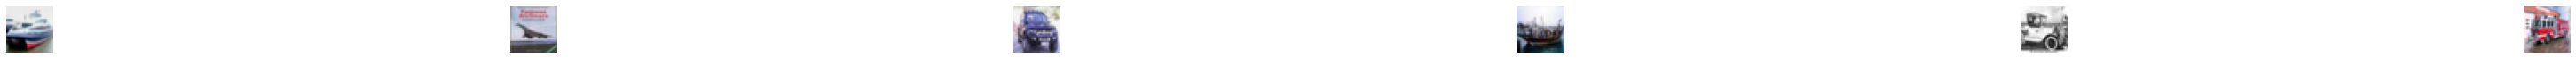

cluster 9
831 elementos


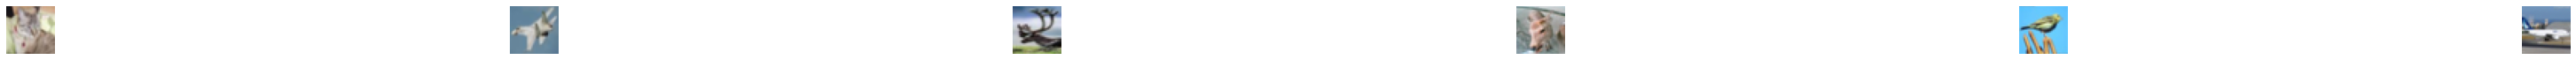

In [ ]:
for i in range(0,n):

    fila = np.where(labels==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # numero imagenes de cada cluster
    r = np.floor(num/10.)    # numero de filas menos 1 en figura de salida 

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(100,100))
    for k in  range(0, 6):#range(0, num):
        plt.subplot(r+1, 10, k+1)
        #plt.figure(figsize = (10,9))
        imagen = test_X[fila[k], ]
        imagen = np.reshape(imagen, (32, 32, 3))
        #plt.imshow((imagen * 255).astype(np.uint8), cmap=plt.cm.gray)
        plt.imshow((image).astype(np.uint8), interpolation='nearest')
        plt.imshow(imagen)
        plt.axis('off')
    plt.show()